# ML Airline - No Differencing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df['LogPassengers'] = np.log(df['Passengers'])

In [5]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [6]:
# Create a machine learniung dataset
series = df['LogPassengers'].to_numpy()

T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

print("X.shape ", X.shape, "Y.shape ", Y.shape)


X.shape  (134, 10) Y.shape  (134,)


In [7]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [8]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
lr.score(Xtrain, Ytrain)

0.9599443783339897

In [9]:
lr.score(Xtest, Ytest)

0.691095304456559

In [10]:
# Crfeate a boolean index
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

train_idx[:T] = False

In [11]:
# 1-step forecast
df.loc[train_idx, 'LR_1step_train'] = lr.predict(Xtrain)
df.loc[test_idx, 'LR_1step_test'] = lr.predict(Xtest)

<Axes: xlabel='Month'>

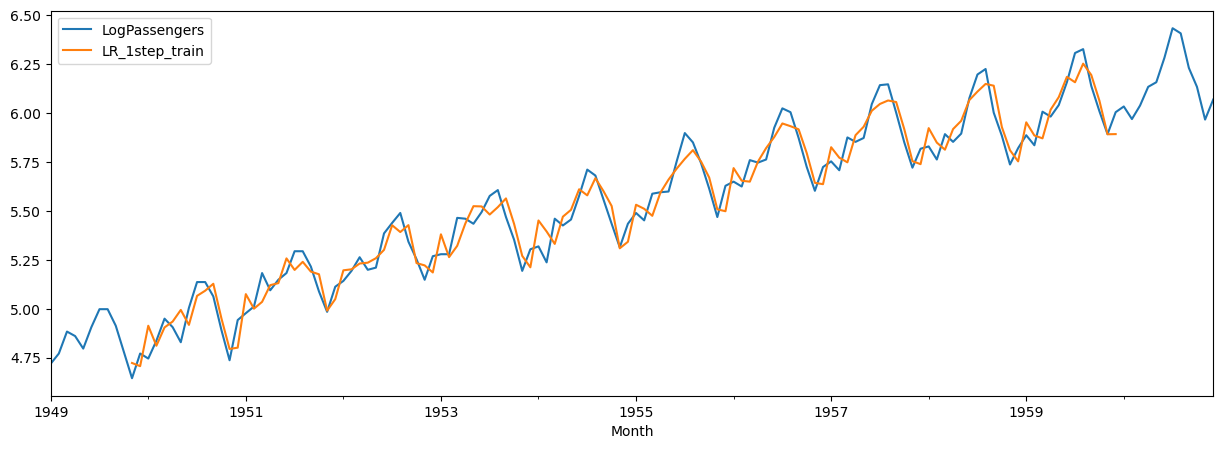

In [12]:
df[['LogPassengers', 'LR_1step_train']].plot(figsize=(15,5))

## Multi Step Forcast

In [13]:
multistep_predictions = []

#first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
    p = lr.predict(last_x.reshape(1, -1))[0]
    
    # update the predicts list
    multistep_predictions.append(p)
    
    # make a newe input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    

In [14]:
df.loc[test_idx, 'LR_multistep'] = multistep_predictions

<Axes: xlabel='Month'>

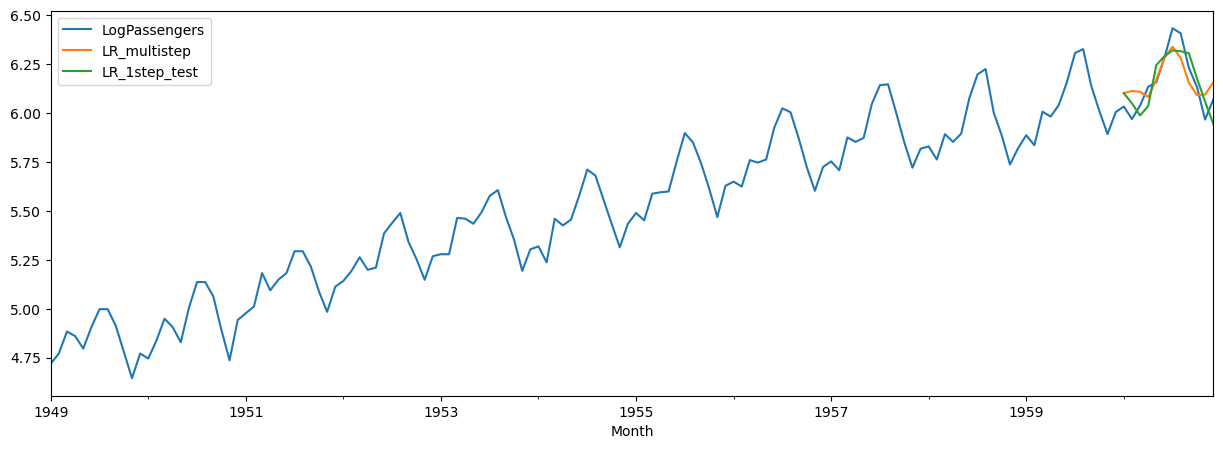

In [15]:
df[['LogPassengers', 'LR_multistep', 'LR_1step_test']].plot(figsize=(15,5))

## Multi-output Model

In [16]:
Tx = T
Ty = Ntest
X = []
y = []
 # at time 7:30